## Feature Engineering
1. person title
2. family size
3. family title

## will be work with following features
pclass, title, sex, age, family size, fare, cabin, embarked

In [1]:
import numpy as np
import pandas as pd

#import warnings
#warnings.filterwarnings('ignore')

from collections import Counter

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
print("Train Data Shape: {}".format(df_train.shape))
df_train.head()

Train Data Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Test Data Shape: {}".format(df_test.shape))
df_test.head()

Test Data Shape: (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
%matplotlib inline
from matplotlib import pyplot as plt, style
style.use("fivethirtyeight")

In [6]:
print("NA Values in Train data")
for column in df_train.columns:
    print("{} : {}".format(column,df_train[column][df_train[column].isna()].size))
print("\nNA Values in Test data")
for column in df_test.columns:
    print("{} : {}".format(column,df_test[column][df_test[column].isna()].size))

NA Values in Train data
PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 687
Embarked : 2

NA Values in Test data
PassengerId : 0
Pclass : 0
Name : 0
Sex : 0
Age : 86
SibSp : 0
Parch : 0
Ticket : 0
Fare : 1
Cabin : 327
Embarked : 0


Sex : {'male': 577, 'female': 314} 


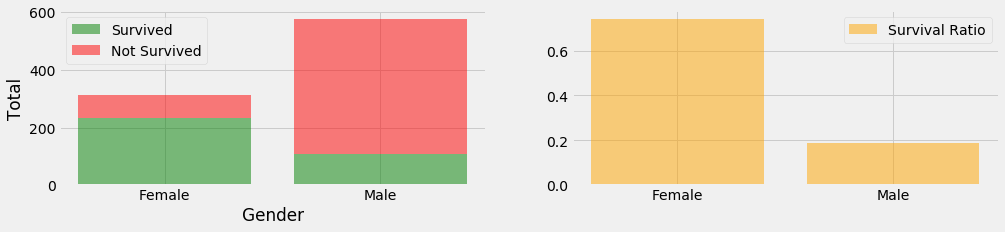

In [7]:
"""
Age,Fare,cabin,embarked have NA values, we will find some way to find it
Feature : Sex lets visualize it
"""
print("Sex : {} ".format(dict(Counter(df_train['Sex']))))

fig = plt.figure(figsize=(15,3))
#ax1
ax1 = fig.add_subplot(1,2,1)
survived = [len(df_train[ (df_train['Survived']==1)&(df_train['Sex']=='male')]),len(df_train[(df_train['Survived']==1)&(df_train['Sex']=='female')])]
not_survived = [len(df_train[(df_train['Survived']==0)&(df_train['Sex']=='male')]),len(df_train[(df_train['Survived']==0)&(df_train['Sex']=='female')])]
ax1.bar(['Male','Female'],survived,label="Survived",color='green',alpha=0.5)
ax1.bar(['Male','Female'],not_survived,bottom=survived,label="Not Survived",color='red',alpha=0.5)
ax1.set_xlabel("Gender")
ax1.set_ylabel("Total")
ax1.legend()
#ax2
ax2 = fig.add_subplot(1,2,2)
survival_rate = [s/t for s,t in zip(survived,np.array(survived)+np.array(not_survived))]
ax2.bar(['Male','Female'],survival_rate,label="Survival Ratio",color='orange',alpha=0.5)
ax2_legend = ax2.legend()

Pclass : {3: 491, 1: 216, 2: 184} 


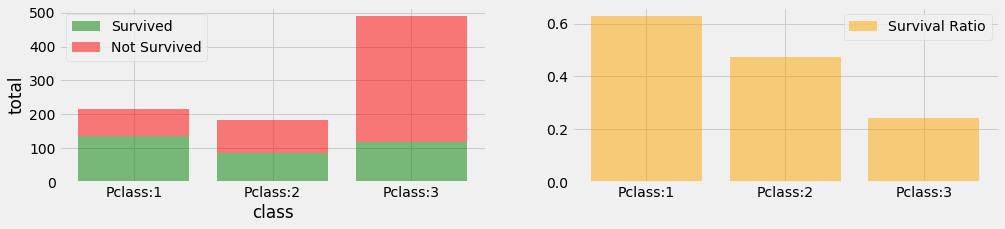

In [8]:
"""
Looks like most of the woman have survived
Now lets look at Pclass
"""
print("Pclass : {} ".format(dict(Counter(df_train['Pclass']))))
pclass = sorted(df_train['Pclass'].unique())
survived = [len(df_train[(df_train['Survived']==1)&(df_train['Pclass']==x)]) for x in pclass ]
not_survived = [len(df_train[(df_train['Survived']==0)&(df_train['Pclass']==x)]) for x in pclass ]
fig = plt.figure(figsize=(15,3))
#ax1
ax1 = fig.add_subplot(1,2,1)
ax1.bar(['Pclass:1','Pclass:2','Pclass:3'],survived,color='green',label="Survived",alpha=0.5)
ax1.bar(['Pclass:1','Pclass:2','Pclass:3'],not_survived,bottom=survived,color='red',label="Not Survived",alpha=0.5)
ax1.set_xlabel("class")
ax1.set_ylabel("total")
ax1.legend()
#ax2
ax2 = fig.add_subplot(1,2,2)
survival_rate = [s/t for s,t in zip(survived,np.array(survived)+np.array(not_survived))]
ax2.bar(['Pclass:1','Pclass:2','Pclass:3'],survival_rate,color='orange',label="Survival Ratio",alpha=0.5)
ax2_legend = ax2.legend()

Embarked : {'S': 644, 'C': 168, 'Q': 77, nan: 2} 


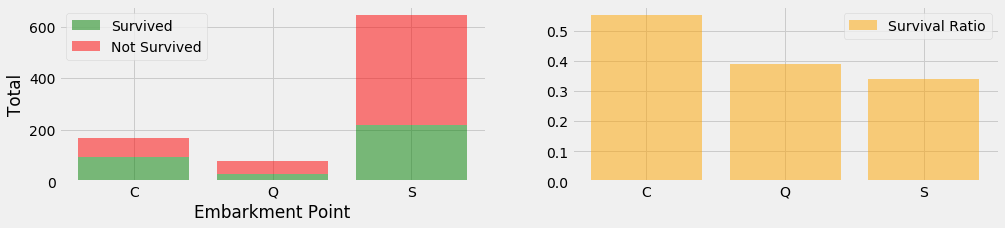

In [9]:
"""
Looks like passenger of class 3 are not able to survive 
Lets look at embarked
"""
print("Embarked : {} ".format(dict(Counter(df_train['Embarked']))))
# S is most common lets replace 2 nan value with that only
df_train.Embarked.fillna('S',inplace=True)
embarked = df_train['Embarked'].unique()

survived = [ len(df_train[ (df_train['Survived']==1)&(df_train['Embarked']==x)] ) for x in embarked ]
not_survived = [ len(df_train[ (df_train['Survived']==0)&(df_train['Embarked']==x)] ) for x in embarked ]
fig = plt.figure(figsize=(15,3))
#ax1
ax1 = fig.add_subplot(1,2,1)
ax1.bar(embarked,survived,label="Survived",color="g",alpha=0.5)
ax1.bar(embarked,not_survived,label="Not Survived",color="r",alpha=0.5,bottom=survived)
ax1.legend()
ax1.set_xlabel('Embarkment Point')
ax1.set_ylabel('Total')
#ax2
ax2 = fig.add_subplot(1,2,2)
survival_rate = [ s/t for s,t in zip(survived,np.array(survived)+np.array(not_survived))]
ax2.bar(embarked,survival_rate,color='orange',alpha=0.5,label='Survival Ratio')
ax2_legend = ax2.legend()

Median Fare : 14.4542


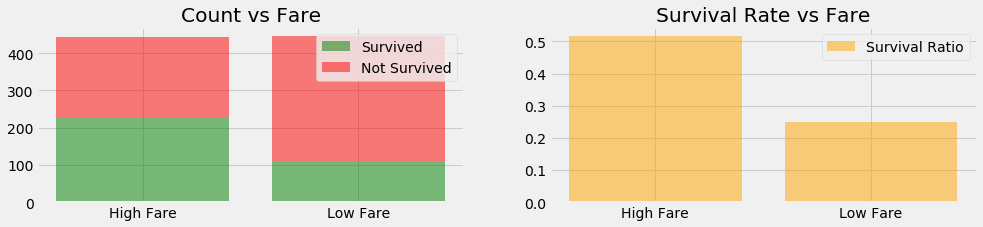

In [10]:
"""
People of C have survived most
'Q' and 'S' doesnt have much different survival rates, lets consider 'Q' same as 'S'
"""
df_train.Embarked.replace('S','Q',inplace=True)
df_test.Embarked.replace('S','Q',inplace=True)
"""
Lets look at fare
"""
df_test['Fare'].fillna(df_train['Fare'].median(),inplace=True)
median_fare = np.median(df_train['Fare'])
print("Median Fare : {}".format(median_fare))
fig= plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.set_title("Count vs Fare");
ax2.set_title("Survival Rate vs Fare")
#ax1
survived = [len(df_train[ (df_train['Survived']==1)&(df_train['Fare']<=median_fare)]),len(df_train[(df_train['Survived']==1)&(df_train['Fare']>median_fare)])] 
not_survived = [len(df_train[ (df_train['Survived']==0)&(df_train['Fare']<=median_fare)]),len(df_train[ (df_train['Survived']==0)&(df_train['Fare']>median_fare)])]
ax1.bar(['Low Fare','High Fare'],survived,label="Survived",color="g",alpha=0.5)
ax1.bar(['Low Fare','High Fare'],not_survived,bottom=survived,label="Not Survived",color="r",alpha=0.5)
ax1.legend()
#ax2
survival_rate = [s/t for s,t in zip(survived,np.array(survived)+np.array(not_survived))]
ax2.bar(['Low Fare','High Fare'],survival_rate,color='orange',label='Survival Ratio',alpha=0.5)
ax2_legend = ax2.legend()

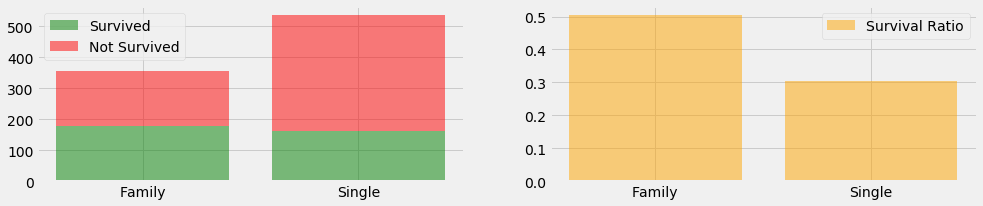

In [11]:
"""
Lets create a new feature:
FamilySize
"""
df_train['FamilySize'] = df_train.SibSp + df_train.Parch + 1
df_test['FamilySize'] = df_test.SibSp + df_test.Parch + 1

"Lets visualize familysize"
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
#ax1
survived = [len(df_train[(df_train["Survived"]==1)&(df_train['FamilySize']==1)]),len(df_train[(df_train["Survived"]==1)&(df_train['FamilySize']>1)])]
not_survived = [len(df_train[(df_train["Survived"]==0)&(df_train['FamilySize']==1)]),len(df_train[(df_train["Survived"]==0)&(df_train['FamilySize']>1)])]
ax1.bar(['Single','Family'],survived,label="Survived",color='g',alpha=0.5)
ax1.bar(['Single','Family'],not_survived,bottom=survived,label="Not Survived",color='r',alpha=0.5)
ax1.legend()
#ax2
survival_ratio = [s/t for s,t in zip(survived,np.array(survived)+np.array(not_survived)) ]
ax2.bar(['Single','Family'],survival_ratio,label="Survival Ratio",color='orange',alpha=0.5)
ax2_legend = ax2.legend()

In [12]:
"""
Looks like Families are more likely to survive
Lets combine train and test data before moving further
"""
df = df_train.append(df_test,sort=False)
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,Q,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Q,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,Q,1
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,3


In [13]:
"""
Lets create another feature: 
title (denoting title )
Surname (will remove later)
"""
name = df.Name.str.split('[,.]',expand=True)
df['Title'] = name[1].str.strip()
df['Surname'] = name[0].str.strip()

In [14]:
print("titles : {} ".format(dict(Counter(df.Title))))
"""
These are similar
Mlle,Mme = Mlle
Capt,Don,Major,Sir = Sir
Dona, Lady, Jonkheer, the Countess
"""
df.Title.replace(['Mlle','Mme'],'Mlle',inplace=True)
df.Title.replace(['Capt','Don','Major','Sir'],'Sir',inplace=True)
df.Title.replace(['Dona','Lady','Jonkheer','the Countess'],'Lady',inplace=True)

print("\ntitles : {} ".format(dict(Counter(df.Title))))

titles : {'Mr': 757, 'Mrs': 197, 'Miss': 260, 'Master': 61, 'Don': 1, 'Rev': 8, 'Dr': 8, 'Mme': 1, 'Ms': 2, 'Major': 2, 'Lady': 1, 'Sir': 1, 'Mlle': 2, 'Col': 4, 'Capt': 1, 'the Countess': 1, 'Jonkheer': 1, 'Dona': 1} 

titles : {'Mr': 757, 'Mrs': 197, 'Miss': 260, 'Master': 61, 'Sir': 5, 'Rev': 8, 'Dr': 8, 'Mlle': 3, 'Ms': 2, 'Lady': 4, 'Col': 4} 


In [15]:
"""replace age na values with mean of their correspoding Title"""
new_ages = []
for index in df[df.Age.isna()].index:
    title = df.iloc[index].Title
    new_ages.append(df[df.Title==title]['Age'].mean())
df.loc[df.Age.isna(),'Age']=np.array(new_ages)

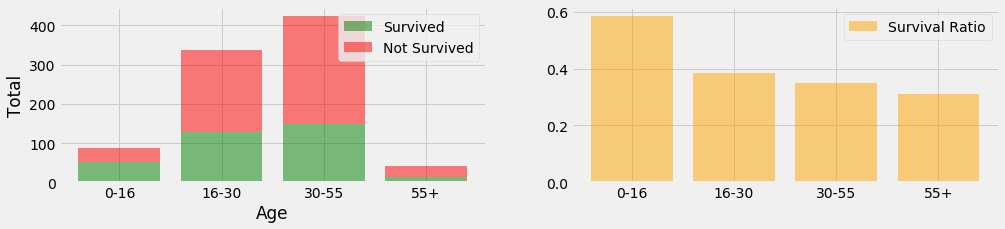

In [16]:
"""Lets visualize age feature"""
fig = plt.figure(figsize=(15,3))
#ax1
ax1 = fig.add_subplot(1,2,1)
df_train  = df[:len(df_train)]

survived = df_train[df_train['Survived']==1]['Age'].astype('int')
not_survived = df_train[df_train['Survived']==0]['Age'].astype('int')

bins = [0,16,30,55,100]
hist_survived, bin_edges = np.histogram(survived,bins)
hist_not_survived, bin_edges = np.histogram(not_survived,bins)

xlabels = ['0-16','16-30','30-55','55+']

ax1.bar(xlabels,hist_survived,label="Survived",color="g",alpha=0.5)
ax1.bar(xlabels,hist_not_survived,bottom=hist_survived,label="Not Survived",color="r",alpha=0.5)
ax1.legend()
ax1.set_xlabel("Age")
ax1.set_ylabel("Total")

#ax2
ax2 = fig.add_subplot(1,2,2)
survival_rate = [s/t for s,t in zip(hist_survived,hist_survived+hist_not_survived)]
ax2.bar(xlabels,survival_rate,label="Survival Ratio",color="orange",alpha=0.5)
ax2.legend()

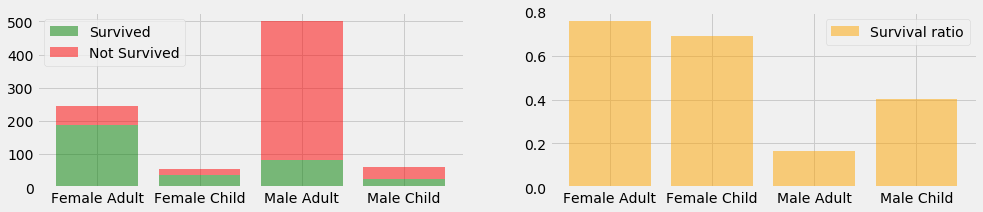

In [17]:
"""
Looks like children are most likely to survive
"""
survived = [len(df_train[(df_train['Survived']==1)&(df_train['Sex']=='male')&(df_train['Age']<18)]),
            len(df_train[(df_train['Survived']==1)&(df_train['Sex']=='female')&(df_train['Age']<18)]),
           len(df_train[(df_train['Survived']==1)&(df_train['Sex']=='male')&(df_train['Age']>18)]),
           len(df_train[(df_train['Survived']==1)&(df_train['Sex']=='female')&(df_train['Age']>18)])]
not_survived = [len(df_train[(df_train['Survived']==0)&(df_train['Sex']=='male')&(df_train['Age']<18)]),
            len(df_train[(df_train['Survived']==0)&(df_train['Sex']=='female')&(df_train['Age']<18)]),
           len(df_train[(df_train['Survived']==0)&(df_train['Sex']=='male')&(df_train['Age']>18)]),
           len(df_train[(df_train['Survived']==0)&(df_train['Sex']=='female')&(df_train['Age']>18)])]
x_labels = ["Male Child","Female Child","Male Adult","Female Adult"]
fig = plt.figure(figsize=(15,3))
#ax1
ax1 = fig.add_subplot(121)
ax1.bar(x_labels,survived,label="Survived",color="g",alpha=0.5,)
ax1.bar(x_labels,not_survived,bottom=survived,label="Not Survived",color="r",alpha=0.5,)
ax1.legend()

#ax2
ax2 = fig.add_subplot(122)
survival_ratio = [s/t for s,t in zip(survived,np.array(survived)+np.array(not_survived))]
ax2.bar(x_labels,survival_ratio,label="Survival ratio",color="orange",alpha=0.5)
ax2.legend()

In [18]:
"""
lets use age as categorical variable then continuos variable as
child,young,adult,old
"""
df["AgeGroup"] = 'Child'
df.loc[ (df['Age']>16) & (df['Age']<=30) , 'AgeGroup'] = 'Young'
df.loc[ (df['Age']>30) & (df['Age']<=55) , 'AgeGroup'] = 'Adult'
df.loc[df['Age']>55, 'AgeGroup'] = 'Old'

In [19]:
print("NA Values")
for column in df.columns:
    print("{} : {}".format(column,df[column][df[column].isna()].size))

NA Values
PassengerId : 0
Survived : 418
Pclass : 0
Name : 0
Sex : 0
Age : 0
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 1014
Embarked : 0
FamilySize : 0
Title : 0
Surname : 0
AgeGroup : 0


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.Embarked = le.fit_transform(df.Embarked)
df.Title = le.fit_transform(df.Title)
df.AgeGroup = le.fit_transform(df.AgeGroup)

"""
Useful columns = PassengerId,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Title,AgeGroup
"""
df_final = df.drop(['Name','Age','SibSp','Parch','Ticket','Cabin','Surname'],axis=1)
df_final.head()

,PassengerId,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Title,AgeGroup
0,1,0.0,3,1,7.2500,1,2,6,3
1,2,1.0,1,0,71.2833,0,2,7,0
2,3,1.0,3,0,7.9250,1,1,4,3
3,4,1.0,1,0,53.1000,1,2,7,0
4,5,0.0,3,1,8.0500,1,1,6,0


In [21]:
#preparing train, test and validation data
train_df = df_final[:len(df_train)].drop(['PassengerId'],axis=1)
test_df = df_final[len(df_train):]

Y = train_df['Survived'].astype('int')
X = train_df.drop(['Survived'],axis=1)
X_test_PassengerId = test_df['PassengerId']
X_test = test_df.drop(['PassengerId','Survived'],axis=1)

from sklearn.model_selection import train_test_split
X_train,X_validation,Y_train,Y_validation = train_test_split(X,Y,test_size=0.2)
print("Train Size : {}\nValidation Size : {}\nTest Size : {}".format(len(X_train),len(X_validation),len(X_test)))

Train Size : 712
Validation Size : 179
Test Size : 418


In [23]:
X.describe()

,Pclass,Sex,Fare,Embarked,FamilySize,Title,AgeGroup
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,32.204208,0.811448,1.904602,5.572391,1.368126
std,0.836071,0.477990,49.693429,0.391372,1.613459,1.292190,1.382578
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,7.910400,1.000000,1.000000,4.000000,0.000000
50%,3.000000,1.000000,14.454200,1.000000,1.000000,6.000000,1.000000
75%,3.000000,1.000000,31.000000,1.000000,2.000000,6.000000,3.000000
max,3.000000,1.000000,512.329200,1.000000,11.000000,10.000000,3.000000


In [24]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
params={
    'num_leaves':[5,10,30],
    'n_estimators':[20,30,50,100],
    'learning_rate':[0.01,0.05],
    'n_jobs':[-1]
}
lgbm = LGBMClassifier()
gridcv = GridSearchCV(lgbm,param_grid=params,scoring='accuracy',n_jobs=1,cv=4,verbose=2)
gridcv.fit(X_train,Y_train)
clf = gridcv.best_estimator_
print(clf)
print("Validation Accuracy : {}".format(clf.score(X_validation,Y_validation)))

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV] learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=5 ....
[CV]  learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=5, total=   0.1s
[CV] learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=5 ....
[CV]  learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=5, total=   0.0s
[CV] learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=5 ....
[CV]  learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=5, total=   0.0s
[CV] learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=5 ....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=5, total=   0.0s
[CV] learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=10 ...
[CV]  learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=10, total=   0.0s
[CV] learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=10 ...
[CV]  learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=10, total=   0.1s
[CV] learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=10 ...
[CV]  learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=10, total=   0.1s
[CV] learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=10 ...
[CV]  learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=10, total=   0.1s
[CV] learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=30 ...
[CV]  learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=30, total=   0.1s
[CV] learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=30 ...
[CV]  learning_rate=0.01, n_estimators=20, n_jobs=-1, num_leaves=30, total=  

[CV]  learning_rate=0.05, n_estimators=20, n_jobs=-1, num_leaves=30, total=   0.1s
[CV] learning_rate=0.05, n_estimators=20, n_jobs=-1, num_leaves=30 ...
[CV]  learning_rate=0.05, n_estimators=20, n_jobs=-1, num_leaves=30, total=   0.1s
[CV] learning_rate=0.05, n_estimators=30, n_jobs=-1, num_leaves=5 ....
[CV]  learning_rate=0.05, n_estimators=30, n_jobs=-1, num_leaves=5, total=   0.1s
[CV] learning_rate=0.05, n_estimators=30, n_jobs=-1, num_leaves=5 ....
[CV]  learning_rate=0.05, n_estimators=30, n_jobs=-1, num_leaves=5, total=   0.1s
[CV] learning_rate=0.05, n_estimators=30, n_jobs=-1, num_leaves=5 ....
[CV]  learning_rate=0.05, n_estimators=30, n_jobs=-1, num_leaves=5, total=   0.1s
[CV] learning_rate=0.05, n_estimators=30, n_jobs=-1, num_leaves=5 ....
[CV]  learning_rate=0.05, n_estimators=30, n_jobs=-1, num_leaves=5, total=   0.1s
[CV] learning_rate=0.05, n_estimators=30, n_jobs=-1, num_leaves=10 ...
[CV]  learning_rate=0.05, n_estimators=30, n_jobs=-1, num_leaves=10, total=   0.

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   11.5s finished


In [25]:
#lets train classifier with full data
clf.fit(X,Y)

predictions = clf.predict(X_test)
#predictions = np.argmax(predictions,axis=1)

In [26]:
sol = pd.DataFrame({
    "PassengerId":X_test_PassengerId,
    "Survived":predictions
})
sol.to_csv("sol.csv",header=True,index=False)

In [27]:
"""
Accuraccy - 0.77033
Keras ANN - 50-relu,50-relu
            loss - binary_crossentropy
            optimizer - adam

from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.utils import np_utils
batch_size =  1
num_classes = 2

Y_train = np_utils.to_categorical(Y_train, num_classes)
Y_validation = np_utils.to_categorical(Y_validation, num_classes)

clf = Sequential()
clf.add(Dense(50,activation='relu',input_shape=(7,)))
clf.add(Dense(50,activation='relu',input_shape=(50,1)))
clf.add(Dropout(0.2))
clf.add(Dense(num_classes,activation='softmax',input_shape=(50,1)))

from keras import losses
from keras import optimizers
clf.compile(loss=losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

clf.fit(
    X_train,
    Y_train,
    validation_data = (X_validation,Y_validation),
    batch_size=batch_size,
    nb_epoch=50,
    verbose=2
)
"""

"\nAccuraccy - 0.77033\nKeras ANN - 50-relu,50-relu\n            loss - binary_crossentropy\n            optimizer - adam\n\nfrom keras.models import Sequential\nfrom keras.layers.core import Dense,Activation,Dropout\nfrom keras.utils import np_utils\nbatch_size =  1\nnum_classes = 2\n\nY_train = np_utils.to_categorical(Y_train, num_classes)\nY_validation = np_utils.to_categorical(Y_validation, num_classes)\n\nclf = Sequential()\nclf.add(Dense(50,activation='relu',input_shape=(7,)))\nclf.add(Dense(50,activation='relu',input_shape=(50,1)))\nclf.add(Dropout(0.2))\nclf.add(Dense(num_classes,activation='softmax',input_shape=(50,1)))\n\nfrom keras import losses\nfrom keras import optimizers\nclf.compile(loss=losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])\n\nclf.fit(\n    X_train,\n    Y_train,\n    validation_data = (X_validation,Y_validation),\n    batch_size=batch_size,\n    nb_epoch=50,\n    verbose=2\n)\n"